## When is Brandenburg Covered in its Entirety?

When trying to generate mosaics covering the entire federal state of Brandenburg it was discovered that even over relatively long time frames (i.e. four weeks) uncovered areas could be detected.
This discovery stands in contrast with the claim that the revisit time in that given latitude would be approximately one week.
This notebook contains the research that was undertaken to find out over which time frame exactly an image of the entire federal state can be generated.

In [1]:
import sentinel_helpers

We first fetch the geometry of the area we are interested in

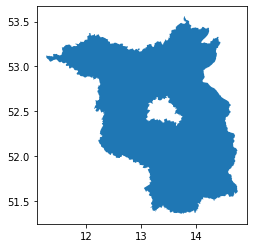

In [2]:
brandenburg = sentinel_helpers.search_osm('Brandenburg, Germany')[:1]
brandenburg.plot()

Now we fetch all available Sentinel-2 level 2a products on SciHub in the last year:

In [3]:
import os
from sentinelsat import SentinelAPI

api = SentinelAPI(os.getenv('SCIHUB_USERNAME'), os.getenv('SCIHUB_PASSWORD'))

We simplify the geometry and convert it to wkt we can run intersection queries against the api:

In [4]:
footprint = brandenburg.convex_hull[0].wkt

The time frame we are interested in spans 365 days (i.e. approximately one year in the Gregorian calendar):

In [5]:
from datetime import date
import datetime

end_date = date(2020, 7, 1)
start_date = end_date - datetime.timedelta(weeks=4)

In [6]:
products = api.query(footprint,
                     platformname='Sentinel-2',
                     processinglevel='Level-2A',
                     date=(start_date, end_date))#,
                     #cloudcoverpercentage=(0,30))

Querying products: 100%|██████████| 181/181 [00:01<00:00, 141.97 products/s]


/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


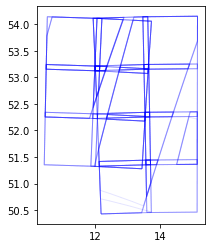

In [7]:
products = api.to_geodataframe(products)

# let's get an overview of all products
products.plot(color='', edgecolor='blue', alpha=0.1)

In [8]:
products['tile'] = products['identifier'].map(lambda s: s.split('_')[5])

T32 vs T33 describe the different longitudinal angle of the captured tiles:

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


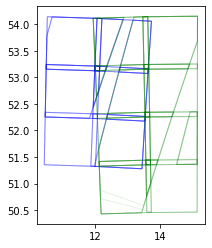

In [9]:
ax = products[products['tile'].str.startswith('T32')].plot(color='', edgecolor='blue', alpha=0.1)
products[products['tile'].str.startswith('T33')].plot(ax=ax, color='', edgecolor='green', alpha=0.1)

We can also see that because of its orbit we always get a different piece of the actual underlying tile:

In [10]:
orbits = products['orbitnumber'].unique()
orbits

array([26231, 17308, 17294, 26188, 17251, 26145, 26131, 17208, 26088,
       17165, 17151, 26045, 17108, 26002, 25988, 17065, 25945, 17022,
       17008, 25902, 16965, 25859, 25845])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


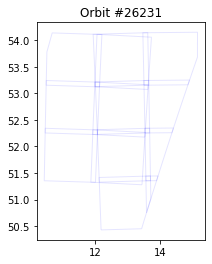

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


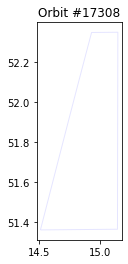

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


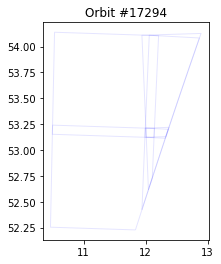

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


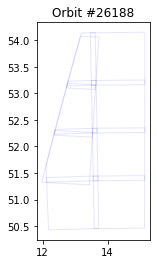

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


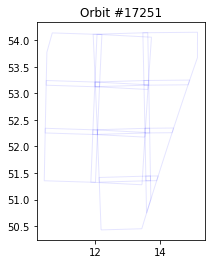

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


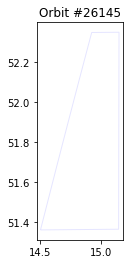

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


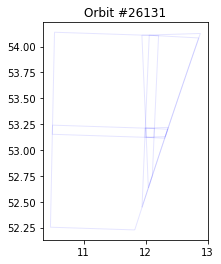

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


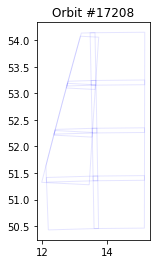

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


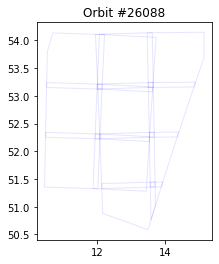

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


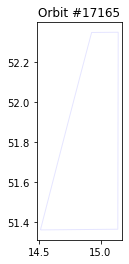

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


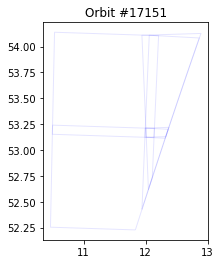

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


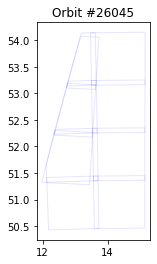

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


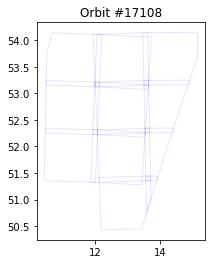

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


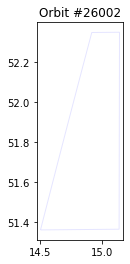

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


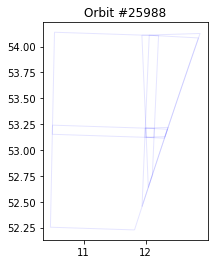

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


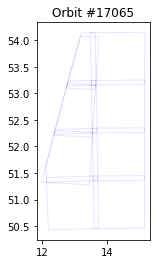

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


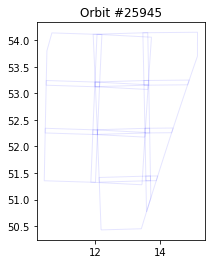

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


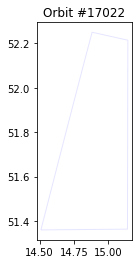

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


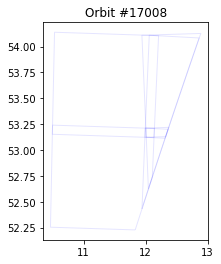

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


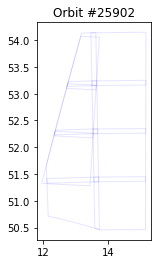

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


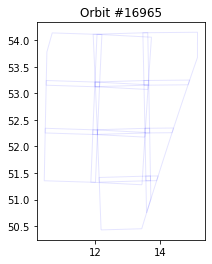

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


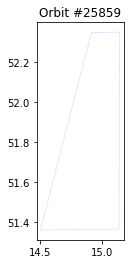

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


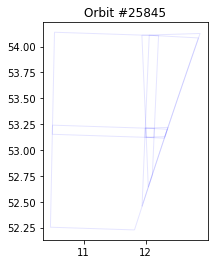

In [12]:
for orbit in orbits:
    ax = products[products['orbitnumber'] == orbit].plot(color='', edgecolor='blue', alpha=0.1)
    ax.set_title('Orbit #{}'.format(orbit))
    plt.show()

The oribts are counted per Sentinel-2 satellite. We have two satellites in the Sentinel-2 program, S2A and S2B.

In [13]:
products[products['orbitnumber'] < 20000].head()

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry,tile
eaf12878-5118-428e-b288-02a9fa32db9a,S2B_MSIL2A_20200629T100029_N0214_R122_T33UVT_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-29T10:00:29.024Z, Instrument: MS...",2020-06-29 10:00:29.024,2020-06-29 10:00:29.024,2020-06-29 21:13:26.631,17308,122,...,GS2B_20200629T100029_017308_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200629T100029_N0214_R122_T33UVT_2...,eaf12878-5118-428e-b288-02a9fa32db9a,"MULTIPOLYGON (((14.51517 51.35970, 15.14019 51...",T33UVT
504e1b3c-a1fe-4288-ba14-a12ade46a3cf,S2B_MSIL2A_20200628T102559_N0214_R108_T32UPE_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-28T10:25:59.024Z, Instrument: MS...",2020-06-28 10:25:59.024,2020-06-28 10:25:59.024,2020-06-28 16:32:22.858,17294,108,...,GS2B_20200628T102559_017294_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200628T102559_N0214_R108_T32UPE_2...,504e1b3c-a1fe-4288-ba14-a12ade46a3cf,"MULTIPOLYGON (((12.13532 53.11988, 12.20926 54...",T32UPE
732f26bc-fc51-46f9-a8ec-119142127abd,S2B_MSIL2A_20200628T102559_N0214_R108_T32UPD_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-28T10:25:59.024Z, Instrument: MS...",2020-06-28 10:25:59.024,2020-06-28 10:25:59.024,2020-06-28 16:30:48.907,17294,108,...,GS2B_20200628T102559_017294_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200628T102559_N0214_R108_T32UPD_2...,732f26bc-fc51-46f9-a8ec-119142127abd,"MULTIPOLYGON (((11.83590 52.22710, 11.86156 52...",T32UPD
7a1d8865-3460-442c-aa10-048a72e0f389,S2B_MSIL2A_20200628T102559_N0214_R108_T32UQD_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-28T10:25:59.024Z, Instrument: MS...",2020-06-28 10:25:59.024,2020-06-28 10:25:59.024,2020-06-28 16:26:29.477,17294,108,...,GS2B_20200628T102559_017294_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200628T102559_N0214_R108_T32UQD_2...,7a1d8865-3460-442c-aa10-048a72e0f389,"MULTIPOLYGON (((11.94117 52.42324, 12.01638 52...",T32UQD
6df29464-2ebe-4c8d-97d0-d63c106e21f2,S2B_MSIL2A_20200628T102559_N0214_R108_T33UUU_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-28T10:25:59.024Z, Instrument: MS...",2020-06-28 10:25:59.024,2020-06-28 10:25:59.024,2020-06-28 16:26:29.307,17294,108,...,GS2B_20200628T102559_017294_N02.14,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_MSIL2A_20200628T102559_N0214_R108_T33UUU_2...,6df29464-2ebe-4c8d-97d0-d63c106e21f2,"MULTIPOLYGON (((12.04520 52.61558, 12.09431 52...",T33UUU


In [14]:
products[products['orbitnumber'] > 20000].head()

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry,tile
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUS_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:25:45.202,26231,65,...,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUS_2...,eb1fec8e-d933-48c3-99f2-c2b3731dc5a1,"MULTIPOLYGON (((12.18393 50.42971, 13.43099 50...",T33UUS
a87c7ff5-8664-4002-9258-7b1508a1de78,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUT_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:25:45.044,26231,65,...,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUT_2...,a87c7ff5-8664-4002-9258-7b1508a1de78,"MULTIPOLYGON (((12.12921 51.32805, 13.70458 51...",T33UUT
f07d56ae-df3c-4402-a63d-e3879e4e671d,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVV_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:25:36.996,26231,65,...,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVV_2...,f07d56ae-df3c-4402-a63d-e3879e4e671d,"MULTIPOLYGON (((13.50402 53.15178, 14.85569 53...",T33UVV
6c1721a4-3628-49dd-a312-788111bf2ce9,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVU_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:25:22.377,26231,65,...,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVU_2...,6c1721a4-3628-49dd-a312-788111bf2ce9,"MULTIPOLYGON (((13.53443 52.25345, 14.36354 52...",T33UVU
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVT_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:25:20.244,26231,65,...,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVT_2...,8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65,"MULTIPOLYGON (((13.56331 51.35443, 13.89039 51...",T33UVT


What is the minimum time span in those four weeks to ensure a coverage of all of Brandenburg?
To find out we iterate through the returned products, each time unifying it with all products we already iterated through.
We then check if the result of that union contains Brandenburg.
If there are not points of the Brandenburg polygon outside the union we terminate.

In [15]:
brandenburg_geometry = brandenburg.iloc[0].geometry

Are the products sorted in the order of their capture or do we need to sort them?

In [16]:
import numpy as np
import pandas  as pd

In [17]:
pd.Series(np.unique(products['beginposition'].values)).is_monotonic

True

No need to sort.
Is the total area covered by the returned products big enough to cover the entirety of Brandenburg?

In [18]:
products['geometry'].unary_union.contains(brandenburg_geometry)

True

In [19]:
# we use tqdm to display a progress 
from tqdm.notebook import tqdm

In [20]:
for idx, product in tqdm(products.iterrows(), total=len(products)):
    union = products.loc[:idx].unary_union
    if union.contains(brandenburg_geometry):
        break

In [21]:
import geopandas as gpd

The blue line represents the outline of the area we selected to cover the geometry shown in pink.

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


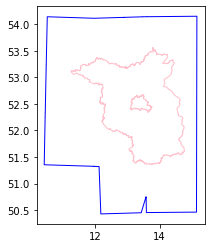

In [22]:
ax = gpd.GeoSeries(union).plot(color='', edgecolor='b')
brandenburg.plot(ax=ax, color='', edgecolor='pink')

What is the time span between first and last product used?

In [23]:
products_in_union = products.loc[:idx]
products_in_union.iloc[0]['beginposition'] - products_in_union.iloc[-1]['beginposition']

Timedelta('3 days 00:10:00')

What does the cloud coverage look like?

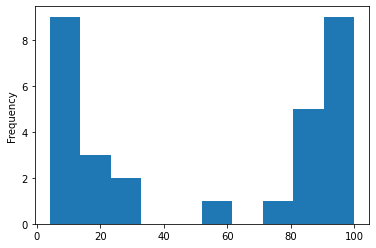

In [24]:
products_in_union['cloudcoverpercentage'].plot.hist()

Not good.
A cloud coverage of 100% is not of much use for us.
We might have to make a compromise between recency and cloud coverage in some cases.

In [25]:
products_in_union.iloc[0]['beginposition'], products_in_union.iloc[-1]['beginposition']

(Timestamp('2020-06-30 10:20:31.024000'),
 Timestamp('2020-06-27 10:10:31.024000'))

In [26]:
less_cloudy_products = products[products['cloudcoverpercentage'] < 50]
for idx, product in tqdm(less_cloudy_products.iterrows(), total=len(less_cloudy_products)):
    union = less_cloudy_products.loc[:idx].unary_union
    if union.contains(brandenburg_geometry):
        break

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:146: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  collection = PatchCollection([PolygonPatch(poly) for poly in geoms], **kwargs)


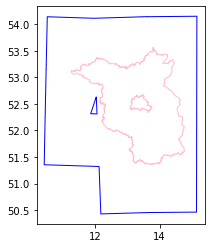

In [27]:
ax = gpd.GeoSeries(union).plot(color='', edgecolor='b')
brandenburg.plot(ax=ax, color='', edgecolor='pink')

In [28]:
products_in_union = less_cloudy_products.loc[:idx]
products_in_union.iloc[0]['beginposition'] - products_in_union.iloc[-1]['beginposition']

Timedelta('15 days 00:04:32')

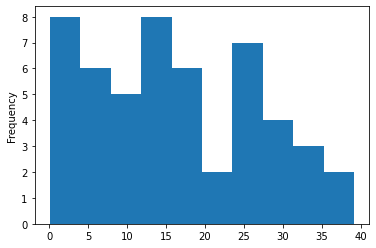

In [29]:
products_in_union['cloudcoverpercentage'].plot.hist()

We can find less cloudy products if we increase the timespan to 15 days.

In [30]:
products_in_union.iloc[0]['beginposition'], products_in_union.iloc[-1]['beginposition']

(Timestamp('2020-06-30 10:20:31.024000'),
 Timestamp('2020-06-15 10:15:59.024000'))

In [31]:
products_in_union

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry,tile
eb1fec8e-d933-48c3-99f2-c2b3731dc5a1,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUS_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:25:45.202,26231,65,...,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUS_2...,eb1fec8e-d933-48c3-99f2-c2b3731dc5a1,"MULTIPOLYGON (((12.18393 50.42971, 13.43099 50...",T33UUS
a87c7ff5-8664-4002-9258-7b1508a1de78,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUT_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:25:45.044,26231,65,...,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UUT_2...,a87c7ff5-8664-4002-9258-7b1508a1de78,"MULTIPOLYGON (((12.12921 51.32805, 13.70458 51...",T33UUT
8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVT_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:25:20.244,26231,65,...,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVT_2...,8c3b2e01-7c8b-43d4-b3e0-1a6a376cdd65,"MULTIPOLYGON (((13.56331 51.35443, 13.89039 51...",T33UVT
7b322eaf-f037-4b4e-a918-d477d0a052ad,S2A_MSIL2A_20200630T102031_N0214_R065_T32UQC_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:11:52.244,26231,65,...,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T32UQC_2...,7b322eaf-f037-4b4e-a918-d477d0a052ad,"MULTIPOLYGON (((13.44210 51.27893, 13.53998 52...",T32UQC
5c6ef9e1-8828-4d6d-8df4-7274e3b10e14,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVS_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-30T10:20:31.024Z, Instrument: MS...",2020-06-30 10:20:31.024,2020-06-30 10:20:31.024,2020-06-30 21:10:52.180,26231,65,...,GS2A_20200630T102031_026231_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200630T102031_N0214_R065_T33UVS_2...,5c6ef9e1-8828-4d6d-8df4-7274e3b10e14,"MULTIPOLYGON (((13.58157 50.75469, 13.63555 50...",T33UVS
04351869-2843-4f17-a706-eff4b1caab2b,S2A_MSIL2A_20200627T101031_N0214_R022_T33UVV_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-27T10:10:31.024Z, Instrument: MS...",2020-06-27 10:10:31.024,2020-06-27 10:10:31.024,2020-06-27 18:18:15.092,26188,22,...,GS2A_20200627T101031_026188_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200627T101031_N0214_R022_T33UVV_2...,04351869-2843-4f17-a706-eff4b1caab2b,"MULTIPOLYGON (((13.50402 53.15178, 15.14598 53...",T33UVV
8ff98302-bc88-4fb4-9f53-c6959af6fa36,S2A_MSIL2A_20200627T101031_N0214_R022_T33UUU_2...,https://scihub.copernicus.eu/a

Let's try to further reduce the amount of products we need to download by dropping identical geometries, keeping the one with the smallest cloud cover:

In [41]:
deduplicated = products_in_union.sort_values(by='cloudcoverpercentage').drop_duplicates(subset=['geometry'])
deduplicated

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,uuid,geometry,tile
4c841fe7-7fa2-4d1e-9893-962dc4301a94,S2A_MSIL2A_20200623T103031_N0214_R108_T33UUU_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:04:38.113,26131,108,...,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T33UUU_2...,4c841fe7-7fa2-4d1e-9893-962dc4301a94,"MULTIPOLYGON (((12.04401 52.63310, 12.05737 52...",T33UUU
93e7901a-94cb-41d2-b23f-780f2a6061a7,S2A_MSIL2A_20200623T103031_N0214_R108_T32UQD_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:03:10.949,26131,108,...,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T32UQD_2...,93e7901a-94cb-41d2-b23f-780f2a6061a7,"MULTIPOLYGON (((11.94274 52.44626, 11.97922 52...",T32UQD
52c652ac-186f-4fd5-ba3d-e937299f7f73,S2A_MSIL2A_20200623T103031_N0214_R108_T32UPD_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:03:53.468,26131,108,...,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T32UPD_2...,52c652ac-186f-4fd5-ba3d-e937299f7f73,"MULTIPOLYGON (((11.82522 52.22730, 11.90169 52...",T32UPD
feb890a1-b3b1-41e8-8c61-283ab92d0f8b,S2A_MSIL2A_20200623T103031_N0214_R108_T32UQE_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:03:20.540,26131,108,...,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T32UQE_2...,feb890a1-b3b1-41e8-8c61-283ab92d0f8b,"MULTIPOLYGON (((12.30821 53.11342, 12.37451 53...",T32UQE
26d5cf3d-e238-4ecb-a60f-89a74f08c291,S2A_MSIL2A_20200623T103031_N0214_R108_T33UUV_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:04:56.168,26131,108,...,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T33UUV_2...,26d5cf3d-e238-4ecb-a60f-89a74f08c291,"MULTIPOLYGON (((12.01091 53.12365, 12.31702 53...",T33UUV
ae2ff382-160d-449c-8856-d450fe861207,S2A_MSIL2A_20200623T103031_N0214_R108_T32UPE_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2020-06-23T10:30:31.024Z, Instrument: MS...",2020-06-23 10:30:31.024,2020-06-23 10:30:31.024,2020-06-23 21:03:56.690,26131,108,...,GS2A_20200623T103031_026131_N02.14,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_MSIL2A_20200623T103031_N0214_R108_T32UPE_2...,ae2ff382-160d-449c-8856-d450fe861207,"MULTIPOLYGON (((12.13532 53.11988, 12.20926 54...",T32UPE
b64d4450-d999-41dc-9ecb-6d263f322dd3,S2B_MSIL2A_20200615T101559_N0214_R065_T33UUU_2...,https://scihub.copernicu

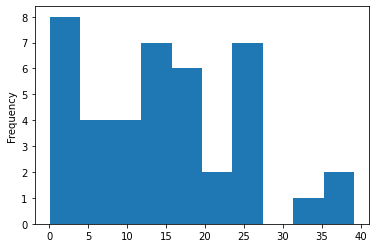

In [42]:
deduplicated['cloudcoverpercentage'].plot.hist()